In [1]:
import pandas as pd
import numpy as np

In [2]:
card = pd.read_excel('creditmarketing_names.xlsx')
card.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [5]:
def lower_lower_clear(df):
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('#_', '')
lower_lower_clear(card)

In [107]:
card.head(12)

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,customers_balance_view
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,Q3
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,Q1
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,Q2
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,Q3
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,Q3
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0,Q3
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0,Q2
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0,Q2
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0,Q3
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0,Q3


In [8]:
card.shape

(18000, 17)

Finding out unique values

In [34]:
for i in card[['offer_accepted', 'reward', 'mailer_type', 'credit_cards_held', 'household_size']]:
    print(card[i].value_counts(), '\n ------------------')

No     16977
Yes     1023
Name: offer_accepted, dtype: int64 
 ------------------
Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64 
 ------------------
Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64 
 ------------------
2    7944
1    6154
3    3387
4     515
Name: credit_cards_held, dtype: int64 
 ------------------
3    5712
4    5543
5    2853
2    2813
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64 
 ------------------


Return first 10 customer_number in decreasing order with highest average balance, ordered by average balance

In [17]:
card[['customer_number', 'average_balance']].sort_values(by = 'average_balance', ascending = False).head(10)

,customer_number,average_balance
2296,2297,3366.25
12635,12636,2948.50
8887,8888,2738.50
10576,10577,2609.50
14003,14004,2437.50
10475,10476,2430.00
2655,2656,2336.75
15259,15260,2320.50
15608,15609,2271.50
8777,8778,2073.25


Getting average balance of each customer and total average

In [18]:
card.groupby(['customer_number']).agg({'average_balance': 'mean'})

,average_balance
customer_number,
1,1160.75
2,147.25
3,276.50
4,1219.00
5,1211.00
...,...
17996,167.50
17997,850.50
17998,1087.25


In [19]:
card['average_balance'].mean()

940.5155624165554



average_balance of customers grouped by income_level



In [21]:
card.groupby(['income_level']).agg({'average_balance': 'mean'})

,average_balance
income_level,
High,942.574021
Low,937.664983
Medium,940.892940




average_balance of customers grouped by bank_accounts_open



In [23]:
card.groupby(['bank_accounts_open']).agg({'average_balance': 'mean'})

,average_balance
bank_accounts_open,
1,941.533604
2,936.469491
3,948.284746


In [24]:
card.groupby(['credit_rating']).agg({'credit_cards_held': 'mean'})

,credit_cards_held
credit_rating,
High,1.895240
Low,1.903811
Medium,1.911587




Checking if there is any correlation between credit_cards_held and bank_accounts_open

As it can be seen below, there are none

In [35]:
corr = card['credit_cards_held'].corr(card['bank_accounts_open'])

-0.0017281895537878053

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


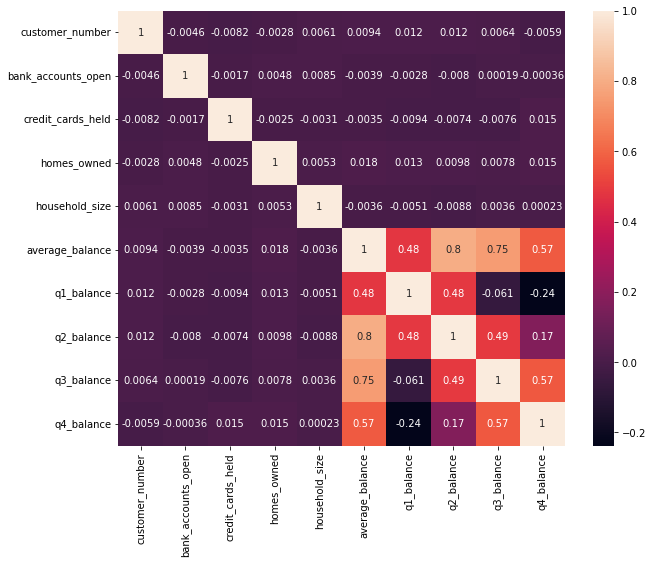

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr_matrix=card.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


Data filtered by:
        - Credit rating medium or high
        - Credit cards held 2 or less
        - Owns their own home
        - Household size 3 or more
Checking out how many customers answered Yes to the offer(offer_accepted column)


In [66]:
main_parameters = card.loc[(card['credit_cards_held'] <= 2) & (card['own_your_home'] == 'Yes') & (card['household_size'] >= 3) 
         & ((card['credit_rating'] == 'High') | (card['credit_rating'] == 'Medium'))].head()

In [103]:
main_parameters['offer_accepted'].value_counts()

No    5
Name: offer_accepted, dtype: int64

There are no 'Yes' in the column offer_accepted from the filtered data



Filtering the customers whom average balance is below the average balance of the whole.



In [77]:
general_mean = card['average_balance'].mean()

In [80]:
card[card['average_balance'] < general_mean].head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
21,22,No,Points,Letter,Medium,1,No,Low,2,2,3,Yes,811.75,720.0,407.0,1224.0,896.0



Column inficating in which percentile each customer is, related to the average_balance mean


In [93]:
iqr = np.nanpercentile(card['average_balance'], 75) - np.nanpercentile(card['average_balance'], 25)
upper_limit = np.nanpercentile(card['average_balance'], 75) + 1.5*iqr
lower_limit = np.nanpercentile(card['average_balance'], 25) - 1.5*iqr
print(upper_limit,'|', lower_limit)

1701.875 | 238.875


In [94]:
percentile_list = []
for i in card['average_balance']:
    if i >= 0 and i < lower_limit:
        percentile_list.append('Q1')
    elif i >= lower_limit and i < general_mean:
        percentile_list.append('Q2')
    elif i >= general_mean and i < upper_limit:
        percentile_list.append('Q3')
    else:
        percentile_list.append('Q4')

In [95]:
card['customers_balance_view'] = percentile_list
card.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,customers_balance_view
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,Q3
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,Q1
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,Q2
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,Q3
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,Q3




Number of people who accepted the offer against those who didn´t



In [97]:
card['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64


Checking if there's difference between average_balances of high and medium credit rating against low credit card rating


In [99]:
high_rank = card[card['credit_rating'] == 'High']
high_rank['average_balance'].mean()

944.3915732189973

In [101]:
medium_rank = card[card['credit_rating'] == 'Medium']
medium_rank['average_balance'].mean()

936.7489101274313

In [102]:
low_rank = card[card['credit_rating'] == 'Low']
low_rank['average_balance'].mean()

940.3407447881641

There is no great difference between high_rank and low_rank, not enough to considerate it a differentiative indicator






Finding out types of communication and with how many customers were used.



In [104]:
card['mailer_type'].value_counts()

Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64

In [106]:
card.groupby(['mailer_type']).agg({'customer_number': 'count'})

,customer_number
mailer_type,
Letter,8853
Postcard,9147



Finding the customer that is the 11th least 'Q1_balance' in your database


In [125]:
ordered_q1 = card[['customer_number', 'q1_balance']].sort_values(by = 'q1_balance', ascending = False)

In [126]:
ordered_q1 = ordered_q1.dropna()

In [127]:
ordered_q1.iloc[[-11]]

,customer_number,q1_balance
4171,4172,1.0



Dealing with nan


In [129]:
card.isnull().sum()

customer_number            0
offer_accepted             0
reward                     0
mailer_type                0
income_level               0
bank_accounts_open         0
overdraft_protection       0
credit_rating              0
credit_cards_held          0
homes_owned                0
household_size             0
own_your_home              0
average_balance           24
q1_balance                24
q2_balance                24
q3_balance                24
q4_balance                24
customers_balance_view     0
dtype: int64

In [149]:
card = card.dropna()

In [151]:
card.isnull().sum()

customer_number           0
offer_accepted            0
reward                    0
mailer_type               0
income_level              0
bank_accounts_open        0
overdraft_protection      0
credit_rating             0
credit_cards_held         0
homes_owned               0
household_size            0
own_your_home             0
average_balance           0
q1_balance                0
q2_balance                0
q3_balance                0
q4_balance                0
customers_balance_view    0
dtype: int64



Train_Test_split


In [177]:
from sklearn.model_selection import train_test_split


X = card.drop('offer_accepted', axis = 1)
y = pd.DataFrame(card['offer_accepted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 150)

In [192]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = np.object)
X_test_cat = X_test.select_dtypes(include = np.object)

C:\Users\guill\AppData\Local\Temp\ipykernel_20720\2384609928.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat = X_train.select_dtypes(include = np.object)
C:\Users\guill\AppData\Local\Temp\ipykernel_20720\2384609928.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include = np.object)


Transforming and encoding

In [193]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()

X_train_norm = transformer.fit_transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train_num.columns)

X_test_norm = transformer.fit_transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test_num.columns)

One hot encoder

In [194]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first')

X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())

X_test_cat_encoded = encoder.fit_transform(X_test_cat).toarray()
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())



In [199]:
X_train_trans = np.concatenate([X_train_norm, X_train_cat_encoded], axis = 1)
X_test_trans = np.concatenate([X_test_norm, X_test_cat_encoded], axis = 1)

X_train_treated = pd.DataFrame(X_train_trans)
X_test_treated = pd.DataFrame(X_test_trans)

In [204]:
X_train_treated.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
dtype: object

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state = 150, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_treated, y_train)

y_test_pred = lr.predict(X_test_treated)

accuracy_score(y_test, y_test_pred)

C:\Users\guill\anaconda3\envs\mid_project\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9471635150166852